         Date          A         AA      AAPL  ABBV        ABC       ABT  \
0  2003-07-31  13.790836  53.019848  1.019303   NaN  12.739487  9.022574   
1  2003-08-01  13.676599  51.759747  1.002379   NaN  12.579965  8.859362   
2  2003-08-04  13.682946  52.256149  1.025589   NaN  12.398233  8.850165   
3  2003-08-05  13.219654  51.206055  0.985455   NaN  12.111500  8.700747   
4  2003-08-06  13.060995  50.783653  0.949190   NaN  11.752071  8.873152   

         ACN       ADBE        ADI  ...       XEL         XL       XLNX  \
0  15.108545  16.333433  26.962475  ...  7.946304  53.450195  19.403030   
1  15.816516  16.268559  28.070812  ...  7.858501  50.491951  19.898077   
2  15.660917  16.523066  28.227112  ...  7.803621  51.500431  19.838972   
3  15.147444  16.183720  27.132978  ...  7.699356  51.856777  19.225708   
4  14.937387  15.749559  27.175615  ...  7.748745  52.643398  19.151808   

         XOM       XRAY        XRX  XYL       YUM       ZION  ZNGA  
0  24.283438  20.140688

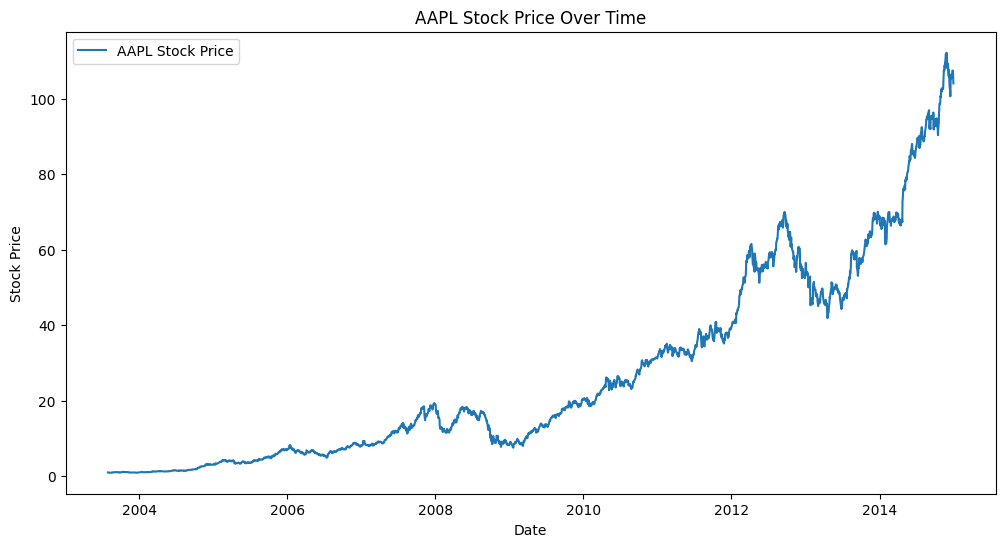

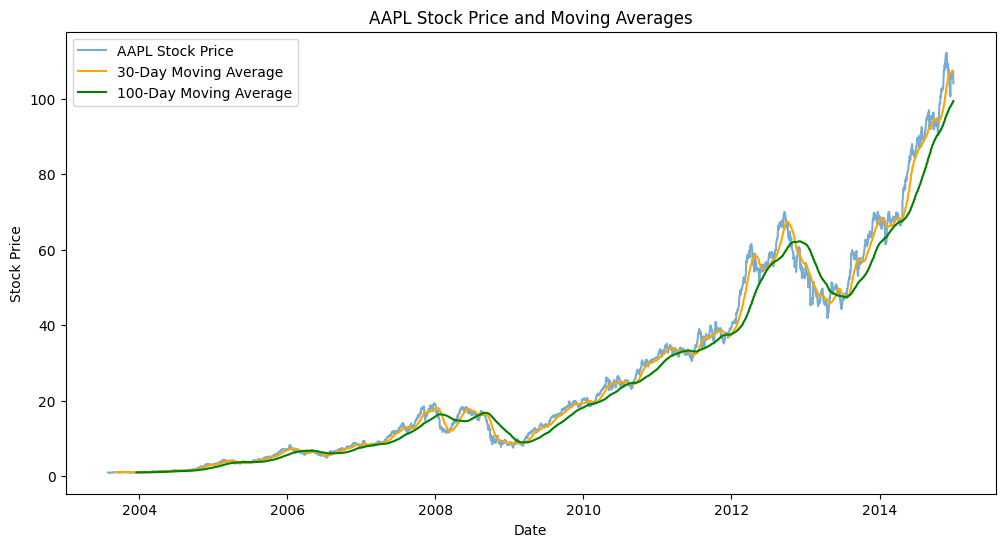

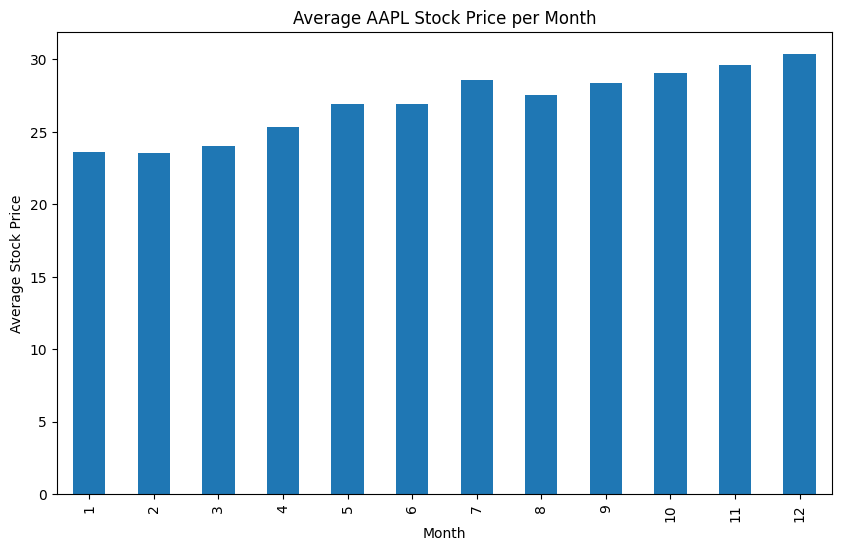

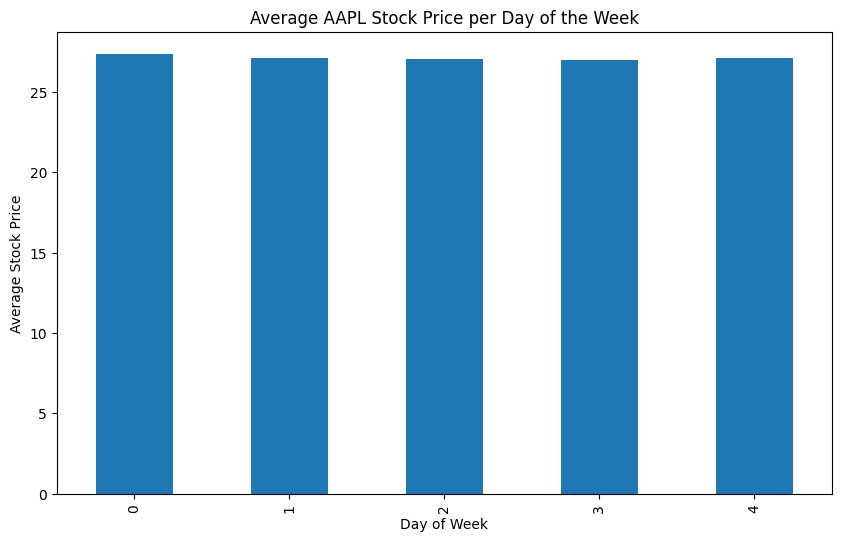

Index(['Date', 'A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XRAY', 'XRX', 'XYL', 'YUM', 'ZION', 'ZNGA', 'AAPL_MA_30',
       'AAPL_MA_100', 'Month', 'DayOfWeek'],
      dtype='object', length=484)


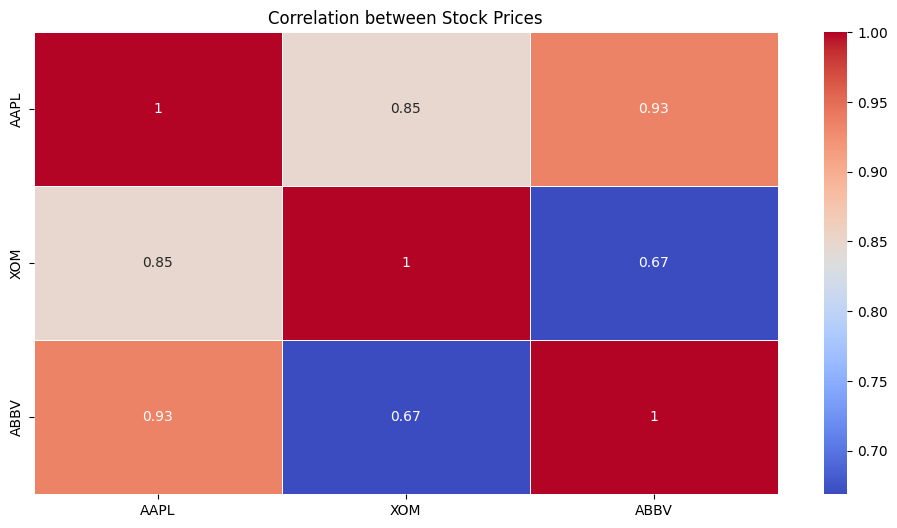

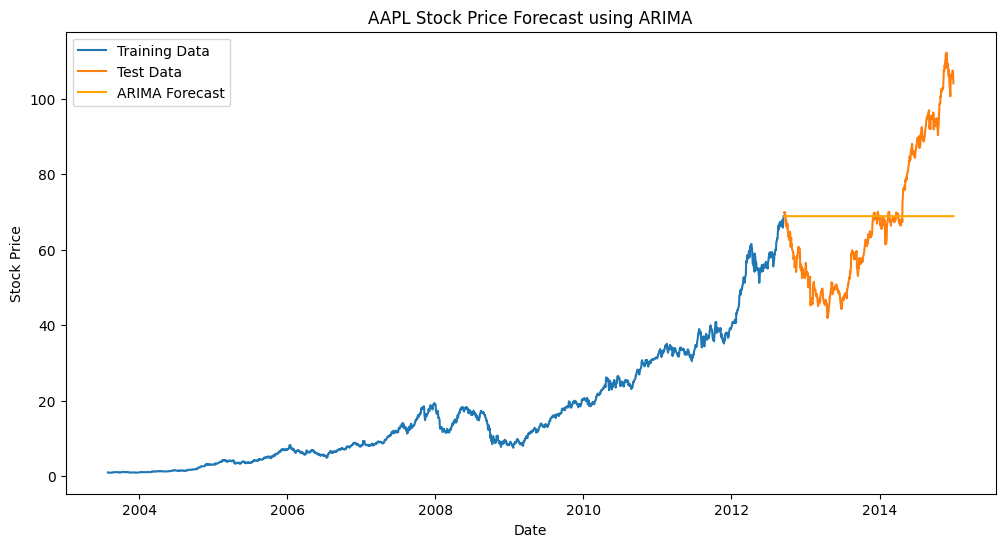

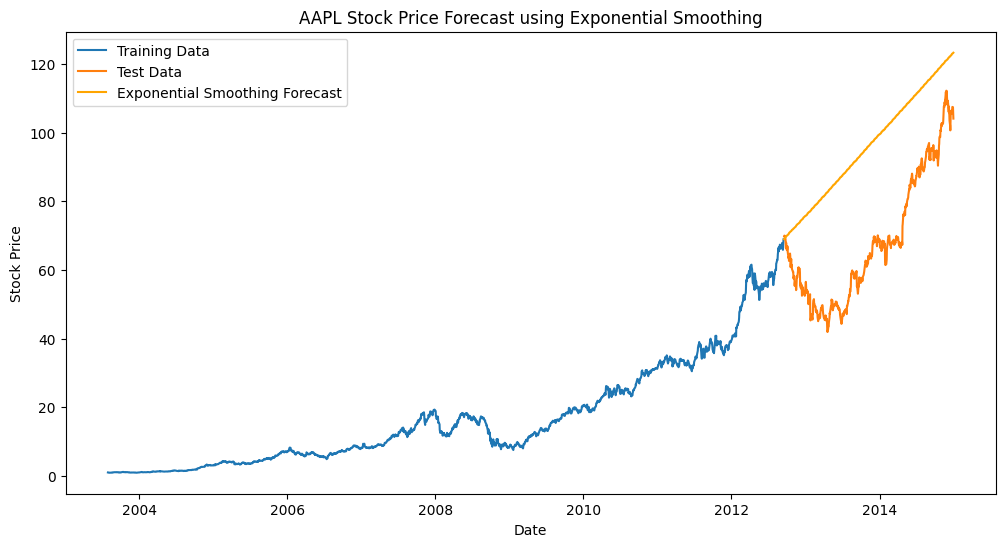

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 1. Import the "Stock_Prices.csv" dataset
df = pd.read_csv("/content/stock_prices.csv")

# 2. Explore the dataset to understand its structure and content
print(df.head())
print(df.info())
print(df.describe())

# 3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series analysis
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

# 4. Plot line charts or time series plots to visualize the historical stock price trends over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL Stock Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 5. Calculate and plot moving averages or rolling averages to identify the underlying trends and smooth out noise
df['AAPL_MA_30'] = df['AAPL'].rolling(window=30).mean()
df['AAPL_MA_100'] = df['AAPL'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL Stock Price', alpha=0.6)
plt.plot(df['Date'], df['AAPL_MA_30'], label='30-Day Moving Average', color='orange')
plt.plot(df['Date'], df['AAPL_MA_100'], label='100-Day Moving Average', color='green')
plt.title('AAPL Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. Perform seasonality analysis to identify periodic patterns in the stock prices
# Extract month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Plot the average stock price for each month
monthly_avg = df.groupby('Month')['AAPL'].mean()
monthly_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average AAPL Stock Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Stock Price')
plt.show()

# Plot the average stock price for each day of the week
weekday_avg = df.groupby('DayOfWeek')['AAPL'].mean()
weekday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average AAPL Stock Price per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Stock Price')
plt.show()

# 7. Analyze and plot the correlation between the stock prices and other variables, like volume
# Check the available columns in the dataset
print(df.columns)

# If 'Volume' column exists, plot correlation, otherwise plot other available columns
if 'Volume' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['AAPL', 'XOM', 'Volume']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock Prices and Volume')
    plt.show()
else:
    # If 'Volume' does not exist, use other columns (adjust accordingly)
    plt.figure(figsize=(12, 6))
    sns.heatmap(df[['AAPL', 'XOM', 'ABBV']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation between Stock Prices')
    plt.show()

# 8. Use ARIMA models or Exponential Smoothing models to forecast future stock prices

# Example using ARIMA model
# Ensure there are no missing values in the column for ARIMA
df['AAPL'].dropna(inplace=True)

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['AAPL'][:train_size], df['AAPL'][train_size:]

# Fit an ARIMA model (p, d, q) - Adjust parameters based on model evaluation
arima_model = ARIMA(train, order=(5, 1, 0))  # Adjust order based on analysis
arima_fit = arima_model.fit()

# Forecast future values
forecast = arima_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:train_size], train, label='Training Data')
plt.plot(df['Date'][train_size:], test, label='Test Data')
plt.plot(df['Date'][train_size:], forecast, label='ARIMA Forecast', color='orange')
plt.title('AAPL Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Example using Exponential Smoothing (Holt-Winters) model
holt_winters_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
holt_winters_fit = holt_winters_model.fit()

# Forecast future values
holt_winters_forecast = holt_winters_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:train_size], train, label='Training Data')
plt.plot(df['Date'][train_size:], test, label='Test Data')
plt.plot(df['Date'][train_size:], holt_winters_forecast, label='Exponential Smoothing Forecast', color='orange')
plt.title('AAPL Stock Price Forecast using Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
